In [1]:
import pandas as pd 
import numpy as np 
import os 
path = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_12_forcasting_segmentation


In [2]:
retail = pd.read_csv("{0}/retail_clean.csv".format(path))

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [4]:
# cleaning data
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [5]:
retail['dayofweek'] = retail['InvoiceDate'].dt.dayofweek

In [6]:
retail['dayofweek'].value_counts()

3    156012
1    134028
2    130782
6    130141
0    124957
4    103175
5       400
Name: dayofweek, dtype: int64

In [7]:
retail['date'] = retail['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [8]:
retail['date']=pd.to_datetime(retail['date'])

In [9]:
### CV2 Coefficient of Variation

In [10]:
retail_grouped = retail.groupby(['Description', 'date']).agg(total_sales=('Quantity', 'sum')).reset_index()

In [11]:
retail_grouped

,Description,date,total_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [13]:
cv_data = retail_grouped.groupby('Description').agg(average=('total_sales', 'mean'), sd=('total_sales', 'std')).reset_index()

In [14]:
cv_data

,Description,average,sd
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112
4,ANIMAL STICKERS,32.083333,11.758620
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700
5280,ZINC WILLIE WINKIE CANDLE STICK,21.116438,23.437864
5281,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549


In [15]:
cv_data['cv_squared'] = (cv_data['sd']/cv_data['average'])**2

In [16]:
cv_data['cv_squared']

0       1.277774
1       1.612460
2       2.171124
3       3.121036
4       0.134324
          ...   
5278    1.643757
5279    1.657355
5280    1.231955
5281    1.004444
5282    1.686838
Name: cv_squared, Length: 5283, dtype: float64

In [17]:
# ADI Average demand interval per product

In [18]:
product_by_date = retail.groupby(['Description', 'date']).agg(count=('Description', 'count')).reset_index()

In [19]:
product_by_date

,Description,date,count
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [20]:
skus = product_by_date.Description.unique()

In [21]:
skus

array(['  DOORMAT UNION JACK GUNS AND ROSES', ' 3 STRIPEY MICE FELTCRAFT',
       ' 4 PURPLE FLOCK DINNER CANDLES', ...,
       'ZINC WILLIE WINKIE  CANDLE STICK', 'ZINC WIRE KITCHEN ORGANISER',
       'ZINC WIRE SWEETHEART LETTER TRAY'], dtype=object)

In [22]:
empty_dataframe = pd.DataFrame()

In [23]:
for sku in skus:
    a = product_by_date[product_by_date.Description == sku]
    a['previous_date'] = a['date'].shift(1)
    empty_dataframe = pd.concat([empty_dataframe, a], axis=0)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
empty_dataframe.head()

,Description,date,count,previous_date
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,NaT
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3,2010-01-05
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1,2010-01-08
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2,2010-01-10
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11


In [26]:
empty_dataframe['Duration']= empty_dataframe['date']-empty_dataframe['previous_date']

In [27]:
empty_dataframe['Duration']

0            NaT
1         3 days
2         2 days
3         1 days
4         1 days
           ...  
440441   22 days
440442    5 days
440443    1 days
440444    6 days
440445    7 days
Name: Duration, Length: 440446, dtype: timedelta64[ns]

In [28]:
empty_dataframe['duration']=empty_dataframe['Duration'].astype('string').str.replace('days 00:00:00.000000000','')


/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [33]:
empty_dataframe['duration']

0         NaT
1          3 
2          2 
3          1 
4          1 
         ... 
440441    22 
440442     5 
440443     1 
440444     6 
440445     7 
Name: duration, Length: 440446, dtype: string

In [34]:
empty_dataframe['duration'] = pd.to_numeric(empty_dataframe['duration'], errors='coerce')

In [35]:
empty_dataframe['duration']

0          NaN
1          3.0
2          2.0
3          1.0
4          1.0
          ... 
440441    22.0
440442     5.0
440443     1.0
440444     6.0
440445     7.0
Name: duration, Length: 440446, dtype: float64

In [36]:
ADI= empty_dataframe.groupby('Description').agg(ADI= ('duration','mean')).reset_index()


In [37]:
adi_cv= pd.merge(ADI, cv_data)


In [38]:
adi_cv

,Description,ADI,average,sd,cv_squared
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,3.741379,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,10.511628,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,8.272727,32.083333,11.758620,0.134324
...,...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.736842,36.522388,46.825017,1.643757
5279,ZINC TOP 2 DOOR WOODEN SHELF,17.550000,5.902439,7.598700,1.657355
5280,ZINC WILLIE WINKIE CANDLE STICK,2.536082,21.116438,23.437864,1.231955
5281,ZINC WIRE KITCHEN ORGANISER,24.333333,2.500000,2.505549,1.004444


In [45]:
def category(dataframe):
    a = 0

    if((dataframe['ADI'] < 1.32) & (dataframe['cv_squared'] < 0.49)):
        a = 'smooth'
    if((dataframe['ADI'] >= 1.32) & (dataframe['cv_squared'] >= 0.49)):
        a = 'lumpy'
    if((dataframe['ADI'] < 1.32) & (dataframe['cv_squared'] >= 0.49)):
        a = 'erratic'
    if((dataframe['ADI'] >= 1.32) & (dataframe['cv_squared'] < 0.49)):
        a='intermittent'
    return a

In [46]:
adi_cv['category']= adi_cv.apply(category, axis=1)
    

In [47]:
adi_cv

,Description,ADI,average,sd,cv_squared,category
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652,6.958333,7.865606,1.277774,lumpy
1,3 STRIPEY MICE FELTCRAFT,3.741379,11.220339,14.247889,1.612460,lumpy
2,4 PURPLE FLOCK DINNER CANDLES,10.511628,7.363636,10.850123,2.171124,lumpy
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458,31.416667,55.502112,3.121036,lumpy
4,ANIMAL STICKERS,8.272727,32.083333,11.758620,0.134324,intermittent
...,...,...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.736842,36.522388,46.825017,1.643757,lumpy
5279,ZINC TOP 2 DOOR WOODEN SHELF,17.550000,5.902439,7.598700,1.657355,lumpy
5280,ZINC WILLIE WINKIE CANDLE STICK,2.536082,21.116438,23.437864,1.231955,lumpy
5281,ZINC WIRE KITCHEN ORGANISER,24.333333,2.500000,2.505549,1.004444,lumpy


In [49]:
adi_cv[adi_cv.category==0]

,Description,ADI,average,sd,cv_squared,category
15,I LOVE LONDON MINI RUCKSACK,NaN,1.0,NaN,NaN,0
32,TOADSTOOL BEDSIDE LIGHT,NaN,2.0,NaN,NaN,0
38,11 PC CERAMIC TEA SET POLKADOT,NaN,3.0,NaN,NaN,0
62,16 PC CUTLERY SET PANTRY DESIGN,NaN,4.0,NaN,NaN,0
145,6 HOOK JEWEL STAND LILAC DRESS,NaN,1.0,NaN,NaN,0
...,...,...,...,...,...,...
5191,WRAP CHRISTMAS DECOUPAGE,NaN,25.0,NaN,NaN,0
5215,WRAP ROMANTIC DECOUPAGE,NaN,25.0,NaN,NaN,0
5228,"WRAPPING PAPER, XMAS VILLAGE",NaN,25.0,NaN,NaN,0
5271,ZINC PLANT POT HOLDER,NaN,8.0,NaN,NaN,0


In [51]:
adi_cv.category.value_counts()

lumpy           4263
intermittent     727
0                210
erratic           74
smooth             9
Name: category, dtype: int64

lumpy           4263
intermittent     727
0                210
erratic           74
smooth             9
Name: category, dtype: int64

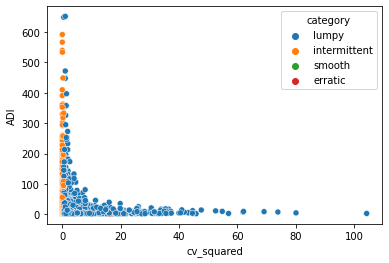

In [50]:
import seaborn as sns

sns.scatterplot(x='cv_squared',y='ADI',hue='category',data=adi_cv[adi_cv.category!=0])


<AxesSubplot:>

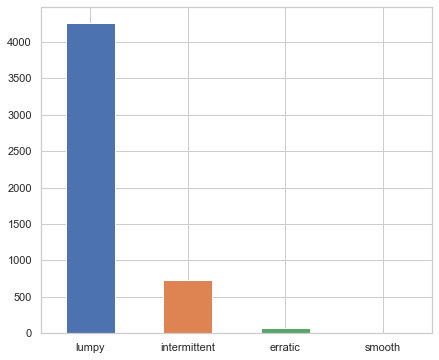

In [70]:
sns.set_theme(style="whitegrid")
adi_cv[adi_cv.category!=0]['category'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0,  color=['C0', 'C1', 'C2', 'C3'])